## Project C：汽车产品聚类分析

In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签


# 数据加载
data = pd.read_csv('./CarPrice_Assignment.csv',encoding="gbk")
# 提取特征训练数据字段
train_x = data.iloc[:,3:]

train_x.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
test

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [2]:
#独热编码处理离散字段
#首先，获取离散字段的字段名
hot_code_column = train_x.dtypes.loc[train_x.dtypes == 'object'].index.tolist()
#离散字段热编码
train_xx = pd.get_dummies(train_x,columns=hot_code_column,prefix_sep='_',dummy_na=False,drop_first=False)
print(train_xx.head())

   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  ...  \
0       3.47    2.68               9.0         111  ...   
1       3.47    2.68               9.0         111  ...   
2       2.68    3.47               9.0         154  ...   
3       3.19    3.40              10.0         102  ...   
4       3.19    3.40               8.0         115  ...   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_1bbl  \
0                      0                   0                0   
1                      0                   0                0   
2                

In [12]:
#检车热编码后字段
train_xx.columns.values

array(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_

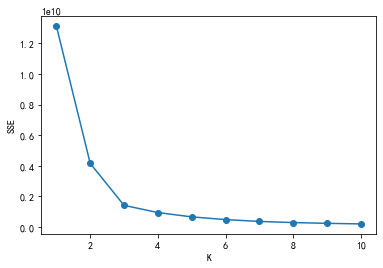

In [3]:
# 确定最佳聚类数
# K-Means 手肘法：
# 统计不同K取值的误差平方和
sse = []
for k in range(1, 11):
 # kmeans算法
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_xx)
 # 计算inertia簇内误差平方和
    sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

In [4]:
#训练Kmeans模型
kmeans = KMeans(n_clusters=3)
# 规范化到[0,1]空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_xx)
# 使用kmeans进行聚类
kmeans.fit(train_xx)
predict_y = kmeans.predict(train_xx)
data['类别'] = predict_y
#data.sort_values(['类别'],ascending=[False])
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,类别
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,2
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,2
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,2
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,2
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,2
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,2


In [5]:
#按照类别排序查看
data_sort = data.sort_values(by='类别')
data_sort

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,类别
69,70,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,...,idi,3.58,3.64,21.5,123,4350,22,25,28176.0,0
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,0
126,127,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,...,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0,0
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,idi,3.58,3.64,21.5,123,4350,22,25,28248.0,0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,...,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,2
101,102,0,nissan dayz,gas,std,four,sedan,fwd,front,100.4,...,mpfi,3.43,3.27,9.0,152,5200,17,22,13499.0,2
84,85,3,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,95.9,...,spdi,3.59,3.86,7.0,145,5000,19,24,14489.0,2
111,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0,2


In [23]:
data_sort

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,类别
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0
115,116,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,mpfi,3.46,3.19,8.4,97,5000,19,24,16630.0,0
114,115,0,peugeot 505s turbo diesel,diesel,turbo,four,wagon,rwd,front,114.2,...,idi,3.70,3.52,21.0,95,4150,25,25,17075.0,0
113,114,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,...,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0,0
112,113,0,peugeot 604sl,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95,4150,28,33,16900.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,2
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,2
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,2
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,2


In [33]:
#查看上汽大众车型所在行，得其类别
res=data_sort[data_sort['CarName'].str.contains("volkswagen")]
res

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,类别
185,186,2,volkswagen type 3,gas,std,four,sedan,fwd,front,97.3,...,mpfi,3.19,3.4,9.0,85,5250,27,34,8195.0,0
186,187,2,volkswagen 411 (sw),gas,std,four,sedan,fwd,front,97.3,...,mpfi,3.19,3.4,9.0,85,5250,27,34,8495.0,0
187,188,2,volkswagen super beetle,diesel,turbo,four,sedan,fwd,front,97.3,...,idi,3.01,3.4,23.0,68,4500,37,42,9495.0,0
188,189,2,volkswagen dasher,gas,std,four,sedan,fwd,front,97.3,...,mpfi,3.19,3.4,10.0,100,5500,26,32,9995.0,0
193,194,0,volkswagen dasher,gas,std,four,wagon,fwd,front,100.4,...,mpfi,3.19,3.4,9.0,88,5500,25,31,12290.0,0
184,185,2,volkswagen model 111,diesel,std,four,sedan,fwd,front,97.3,...,idi,3.01,3.4,23.0,52,4800,37,46,7995.0,0
183,184,2,volkswagen 1131 deluxe sedan,gas,std,two,sedan,fwd,front,97.3,...,mpfi,3.19,3.4,9.0,85,5250,27,34,7975.0,0
192,193,0,volkswagen rabbit custom,diesel,turbo,four,sedan,fwd,front,100.4,...,idi,3.01,3.4,23.0,68,4500,33,38,13845.0,1
191,192,0,volkswagen rabbit,gas,std,four,sedan,fwd,front,100.4,...,mpfi,3.19,3.4,8.5,110,5500,19,24,13295.0,1


In [6]:
#与7款VW车型类别相同的竞争对手
res2=data_sort[data_sort['类别']==0]
res2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,类别
69,70,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,...,idi,3.58,3.64,21.5,123,4350,22,25,28176.0,0
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,0
126,127,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,...,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0,0
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,idi,3.58,3.64,21.5,123,4350,22,25,28248.0,0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,...,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0,0
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0,0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,0


In [35]:
res2['CarName']

173                  toyota corolla
163         toyota corolla liftback
164                   toyota corona
165       toyota celica gt liftback
100                    nissan nv200
                   ...             
183    volkswagen 1131 deluxe sedan
42               honda civic (auto)
50                        maxda rx3
51                 maxda glc deluxe
182                vokswagen rabbit
Name: CarName, Length: 124, dtype: object